<a href="https://colab.research.google.com/github/danieleduardofajardof/DataSciencePrepMaterial/blob/main/Prob_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Probability Theory

## 1. Basic Probability Concepts
- **Experiment:** Any procedure that yields an outcome.
- **Sample Space (S):** The set of all possible outcomes.
- **Event:** A subset of the sample space.
- **Probability of Event A ($P(A)$):**

  $$
  0 \leq P(A) \leq 1, \quad \sum P(A_i) = 1
  $$

---

## 2. Random Variables and Distributions
- **Random Variable (RV):** A variable that takes values based on the outcome of a random experiment.
  - **Discrete RV:** Countable values (e.g., rolling dice).
  - **Continuous RV:** Infinite values over a range (e.g., height, weight).
- **Probability Distribution:** Function that gives probabilities for each possible value.
  - **PMF (Probability Mass Function):** For discrete RVs.
  - **PDF (Probability Density Function):** For continuous RVs.
  - **CDF (Cumulative Distribution Function):**

    $$
    F(x) = P(X \leq x)
    $$

---

## 3. Probability Rules
- **Addition Rule (for any events A and B):**

  $$
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
  $$

- **Multiplication Rule (for independent events):**

  $$
  P(A \cap B) = P(A) \cdot P(B)
  $$

- **Complement Rule:**

  $$
  P(A^c) = 1 - P(A)
  $$

- **Independence:** Events A and B are independent if

  $$
  P(A \cap B) = P(A)P(B)
  $$

- **Expected Value (Mean):**
  - Discrete:

    $$
    \mathbb{E}[X] = \sum x \cdot P(x)
    $$

  - Continuous:

    $$
    \mathbb{E}[X] = \int x \cdot f(x) \, dx
    $$

- **Variance:**

  $$
  \text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
  $$

---

## 4. Conditional Probability and Bayes’ Theorem
- **Conditional Probability:**

  $$
  P(A|B) = \frac{P(A \cap B)}{P(B)}
  $$

- **Bayes’ Theorem:**

  $$
  P(A|B) = \frac{P(B|A)P(A)}{P(B)}
  $$

  - Used for updating beliefs based on evidence.

---

## 5. Hypothesis Testing
- **Null Hypothesis ($H_0$):** Default assumption (e.g., no effect).
- **Alternative Hypothesis ($H_1$):** What you want to prove.
- **Test Statistic:** A value calculated from sample data.
- **p-value:** Probability of observing a result as extreme as the sample under $H_0$.
  - If $p < \alpha$, reject $H_0$.
- **Type I Error (False Positive):** Rejecting $H_0$ when it’s true.
- **Type II Error (False Negative):** Failing to reject $H_0$ when $H_1$ is true.
- **Common Tests:**
  - Z-test
  - t-test
  - Chi-square test
  - ANOVA


## Hypothesis Testing (Detailed Guide)

### What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make decisions about a population based on sample data. It helps answer questions like: _Is there enough evidence to support a claim?_

---

### Key Concepts

- **Null Hypothesis ($H_0$):** The default assumption.  
  _Example: The new drug has no effect._

- **Alternative Hypothesis ($H_1$):** The statement you want to test or prove.  
  _Example: The new drug has a positive effect._

- **Test Statistic:** A value calculated from sample data used to decide whether to reject $H_0$.

- **p-value:** The probability of obtaining results at least as extreme as the observed results under $H_0$.

- **Significance Level ($\alpha$):** A threshold (commonly 0.05). If $p < \alpha$, reject $H_0$.

- **Type I Error:** Rejecting $H_0$ when it's actually true (false positive).

- **Type II Error:** Failing to reject $H_0$ when $H_1$ is true (false negative).

---

## Common Tests with Examples

---

### 1. Z-test (One-sample, known population std)

#### Example:

You want to test if a sample of students' average IQ (sample mean = 103) is different from the population mean of 100.  
Assume known population standard deviation $\sigma = 15$ and $n = 50$.

#### Hypotheses:

- $H_0$: $\mu = 100$  
- $H_1$: $\mu \neq 100$ (two-tailed)

#### Test Statistic:

$$
z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} = \frac{103 - 100}{15 / \sqrt{50}} \approx 1.414
$$

In [3]:
import scipy.stats as stats
import numpy as np

mu = 100
sample_mean = 103
sigma = 15
n = 50

z = (sample_mean - mu) / (sigma / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-score: {z:.3f}")
print(f"P-value: {p_value:.3f}")

Z-score: 1.414
P-value: 0.157


---
### 2. t-test (One-sample, unknown population std)

#### Example:
A sample of 20 students had an average score of 78 with a sample standard deviation of 10. Is the average score different from 75?

#### Hypotheses:

- $H_0$: $\mu = 75$

- $H_1$: $\mu \neq 75$


In [4]:
from scipy.stats import ttest_1samp

data = [78, 80, 75, 72, 76, 85, 79, 83, 77, 74, 76, 81, 75, 78, 80, 79, 82, 76, 74, 77]
t_stat, p_val = ttest_1samp(data, popmean=75)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: 3.847
P-value: 0.001


---
### 3. Chi-Square Test (Goodness of Fit)
Example:
You roll a die 60 times. Observed outcomes: [8, 9, 10, 11, 12, 10]
Expected outcome for fair die: [10, 10, 10, 10, 10, 10]

Hypotheses:

- $H_0$: The die is fair

- $H_1$: The die is not fair

In [5]:
from scipy.stats import chisquare

observed = [8, 9, 10, 11, 12, 10]
expected = [10] * 6

chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square statistic: {chi_stat:.3f}")
print(f"P-value: {p_val:.3f}")

Chi-square statistic: 1.000
P-value: 0.963


---
### 4. ANOVA (Analysis of Variance)
#### Example:
You want to test if three different teaching methods lead to different exam scores.

Data (Scores grouped by teaching method):

In [6]:
from scipy.stats import f_oneway

group1 = [85, 86, 88, 75, 78]
group2 = [80, 82, 84, 81, 83]
group3 = [78, 79, 77, 76, 75]

f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")


F-statistic: 3.741
P-value: 0.055


#### Hypotheses:
- $H_0$: All group means are equal

- $H_1$: At least one group mean is different

| Test Type   | Use Case                        | Assumptions                                  |
|-------------|----------------------------------|-----------------------------------------------|
| Z-test      | One sample, known std            | Normal distribution, known $\sigma$           |
| t-test      | One or two samples, unknown std  | Normal distribution, unknown $\sigma$         |
| Chi-Square  | Categorical data                 | Large sample size, expected freq > 5          |
| ANOVA       | Compare means across 3+ groups   | Equal variances, normality of each group      |


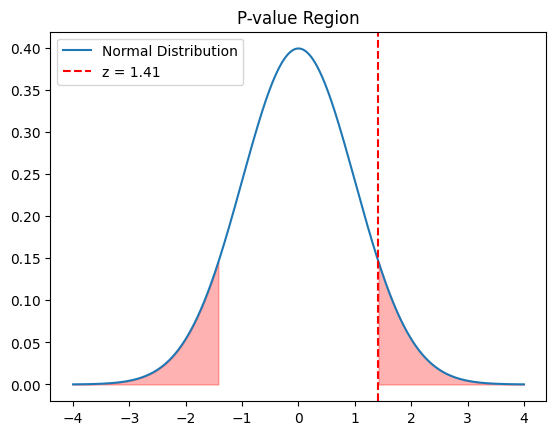

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, label='Normal Distribution')
plt.axvline(z, color='red', linestyle='--', label=f'z = {z:.2f}')
plt.fill_between(x, y, where=(x > abs(z)), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x < -abs(z)), color='red', alpha=0.3)
plt.title("P-value Region")
plt.legend()
plt.show()
